In [1]:
from metric_analysis import labels, subgroup_fairness_analysis
label = 0    # No finding
# label = 10 # Pleural effusion
print(labels[label])


No Finding


#DISEASE CLASSIFIFCATION

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0863
All	TPR 0.80 | FPR 0.20 | AUC 0.87
White	TPR 0.80 | FPR 0.20 | AUC 0.88
Asian	TPR 0.78 | FPR 0.20 | AUC 0.86
Black	TPR 0.81 | FPR 0.20 | AUC 0.88
Female	TPR 0.75 | FPR 0.17 | AUC 0.86
Male	TPR 0.84 | FPR 0.22 | AUC 0.88
All	AP 0.41
White	AP 0.42
Asian	AP 0.40
Black	AP 0.41
Female	AP 0.42
Male	AP 0.41


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


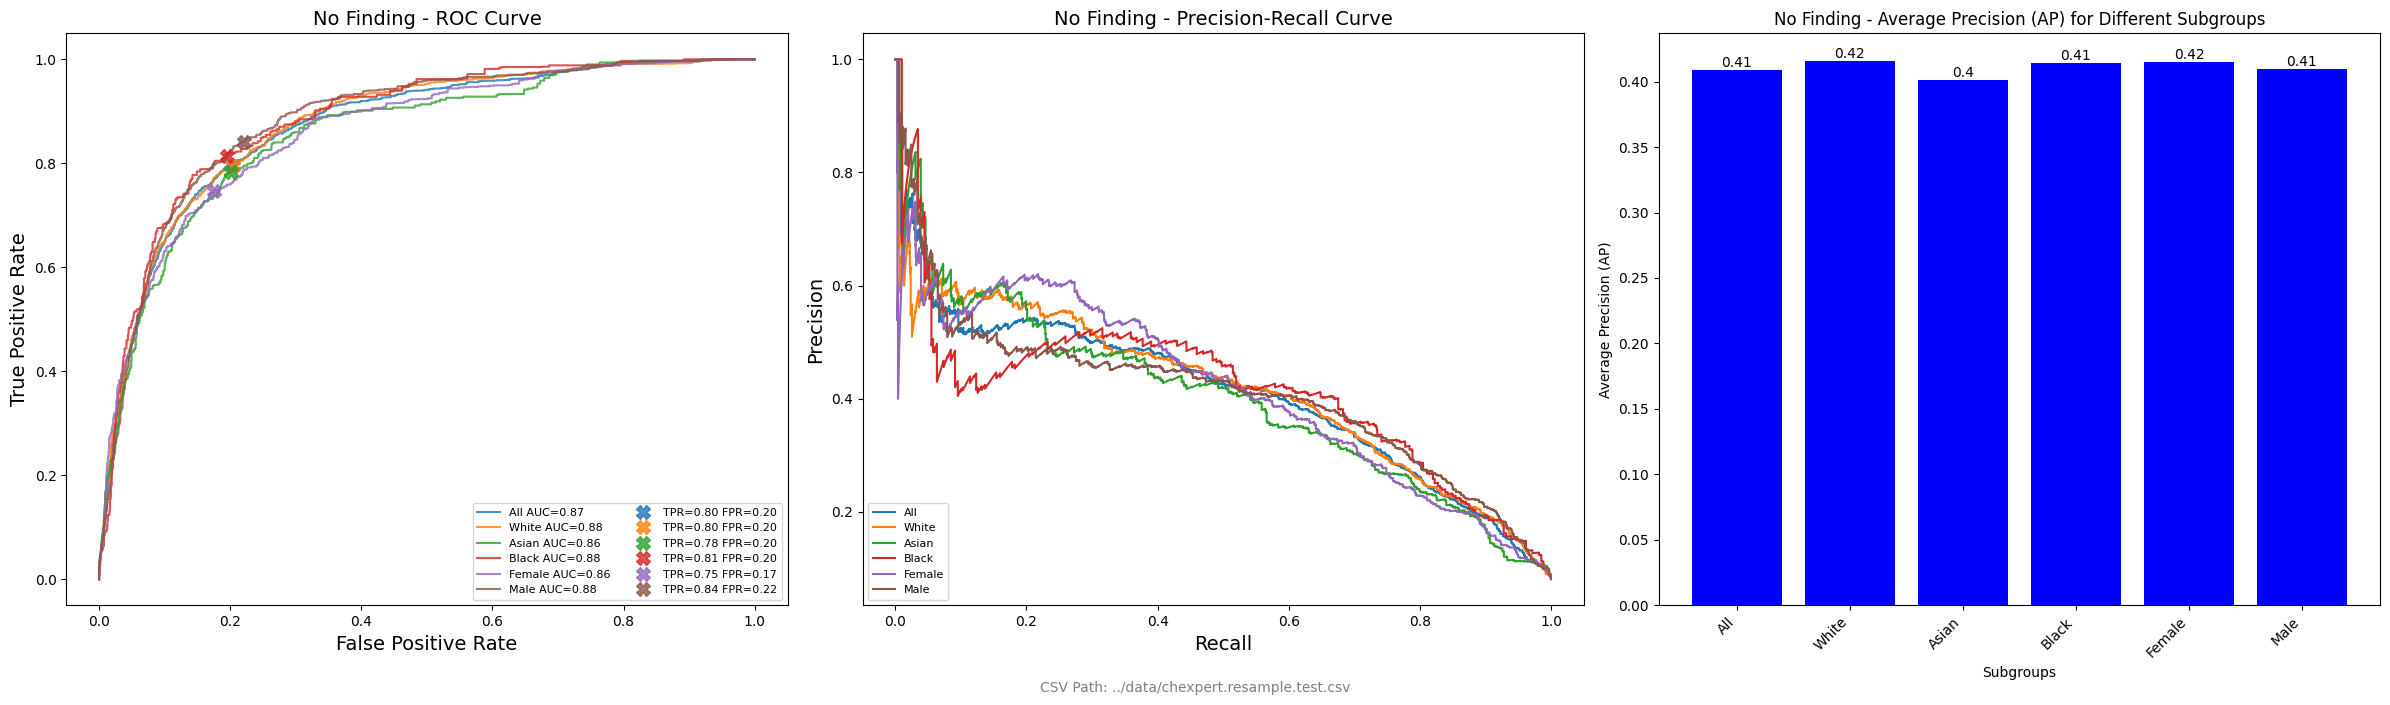

In [2]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/disease/batch_150_epochs_20_nonli-resnet-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.4439
All	TPR 0.75 | FPR 0.20 | AUC 0.86
White	TPR 0.77 | FPR 0.22 | AUC 0.86
Asian	TPR 0.80 | FPR 0.20 | AUC 0.88
Black	TPR 0.69 | FPR 0.18 | AUC 0.84
Female	TPR 0.77 | FPR 0.21 | AUC 0.86
Male	TPR 0.74 | FPR 0.19 | AUC 0.86
All	AP 0.81
White	AP 0.81
Asian	AP 0.83
Black	AP 0.78
Female	AP 0.82
Male	AP 0.80


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


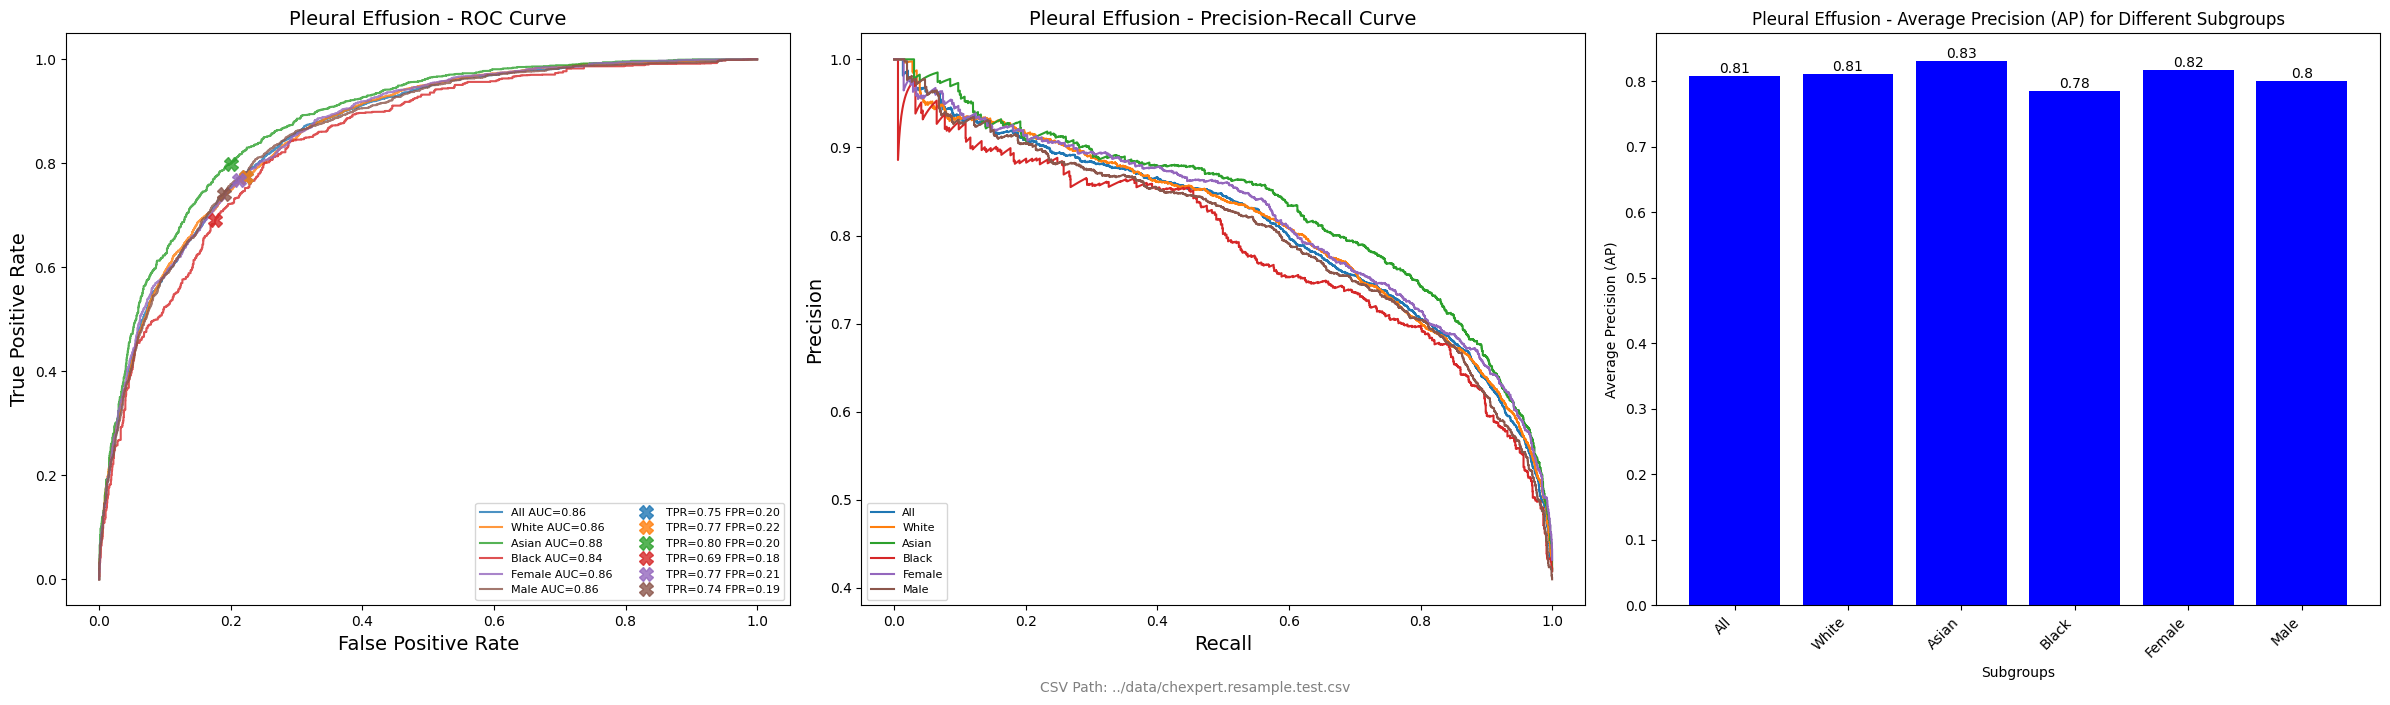

In [3]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/disease/batch_150_epochs_20_nonli-resnet-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0371
All	TPR 0.72 | FPR 0.20 | AUC 0.83
White	TPR 0.75 | FPR 0.21 | AUC 0.83
Asian	TPR 0.67 | FPR 0.20 | AUC 0.81
Black	TPR 0.75 | FPR 0.19 | AUC 0.84
Female	TPR 0.66 | FPR 0.17 | AUC 0.81
Male	TPR 0.78 | FPR 0.23 | AUC 0.84
All	AP 0.32
White	AP 0.34
Asian	AP 0.30
Black	AP 0.32
Female	AP 0.31
Male	AP 0.33


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


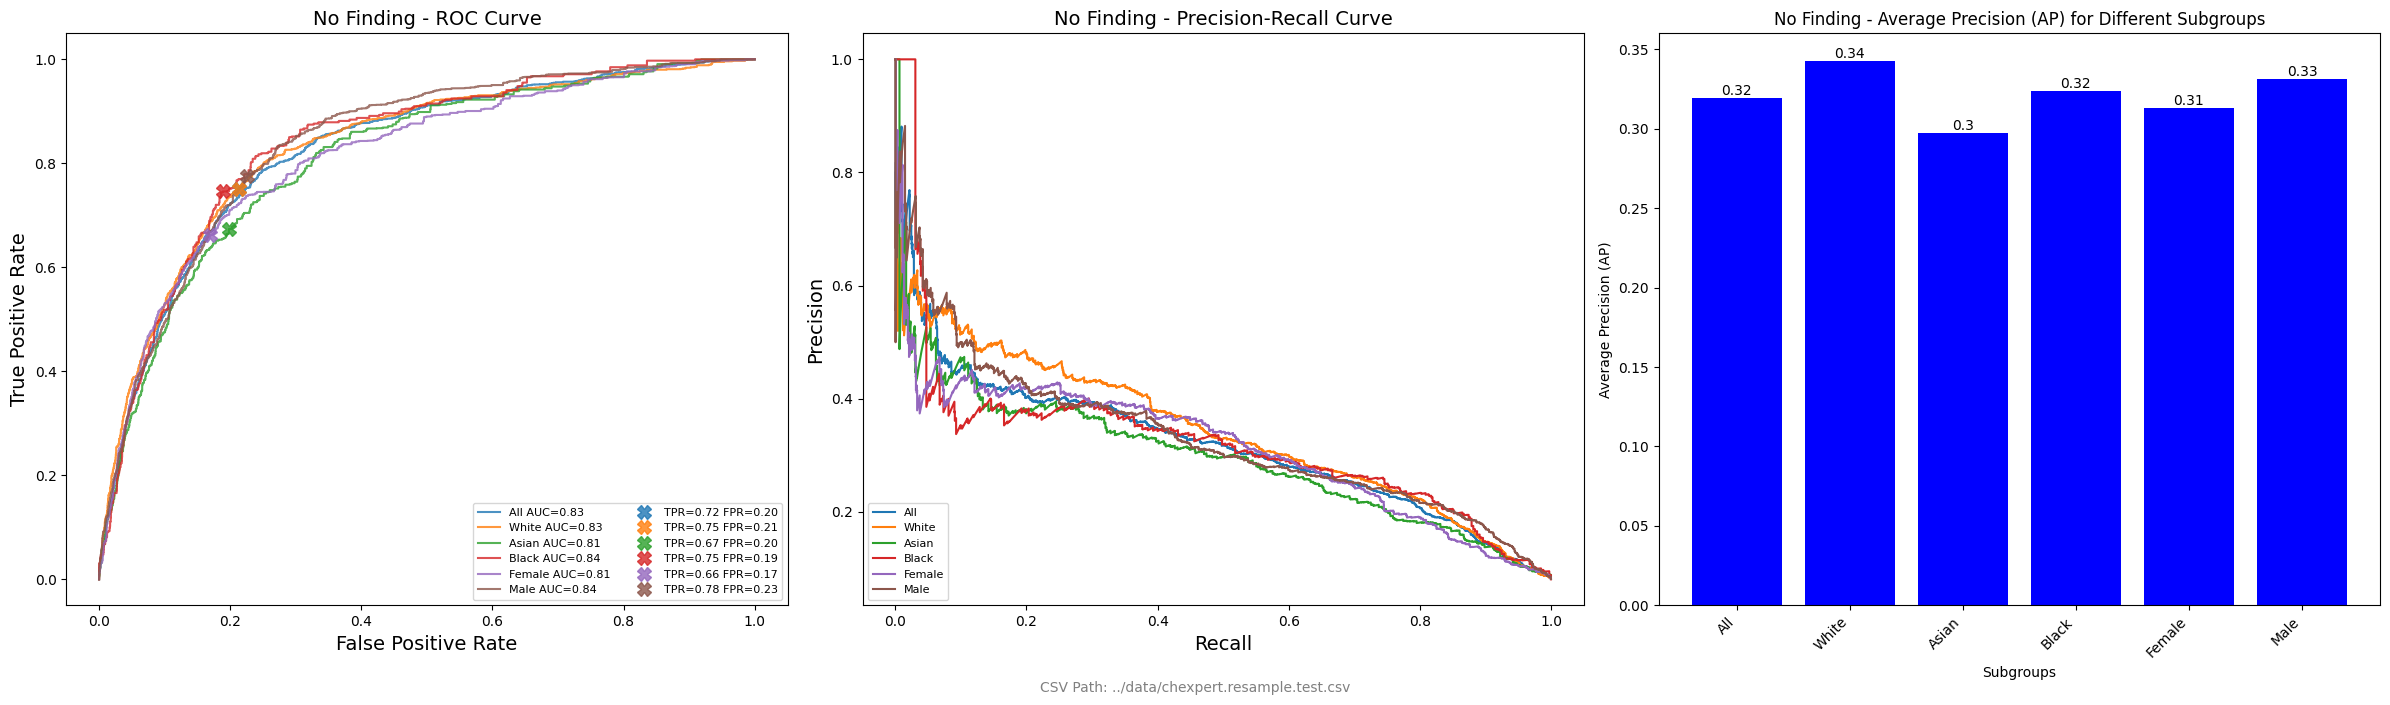

In [4]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.7117
All	TPR 0.63 | FPR 0.20 | AUC 0.80
White	TPR 0.64 | FPR 0.21 | AUC 0.80
Asian	TPR 0.69 | FPR 0.21 | AUC 0.82
Black	TPR 0.56 | FPR 0.18 | AUC 0.78
Female	TPR 0.65 | FPR 0.21 | AUC 0.80
Male	TPR 0.62 | FPR 0.19 | AUC 0.80
All	AP 0.71
White	AP 0.72
Asian	AP 0.73
Black	AP 0.69
Female	AP 0.73
Male	AP 0.70


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


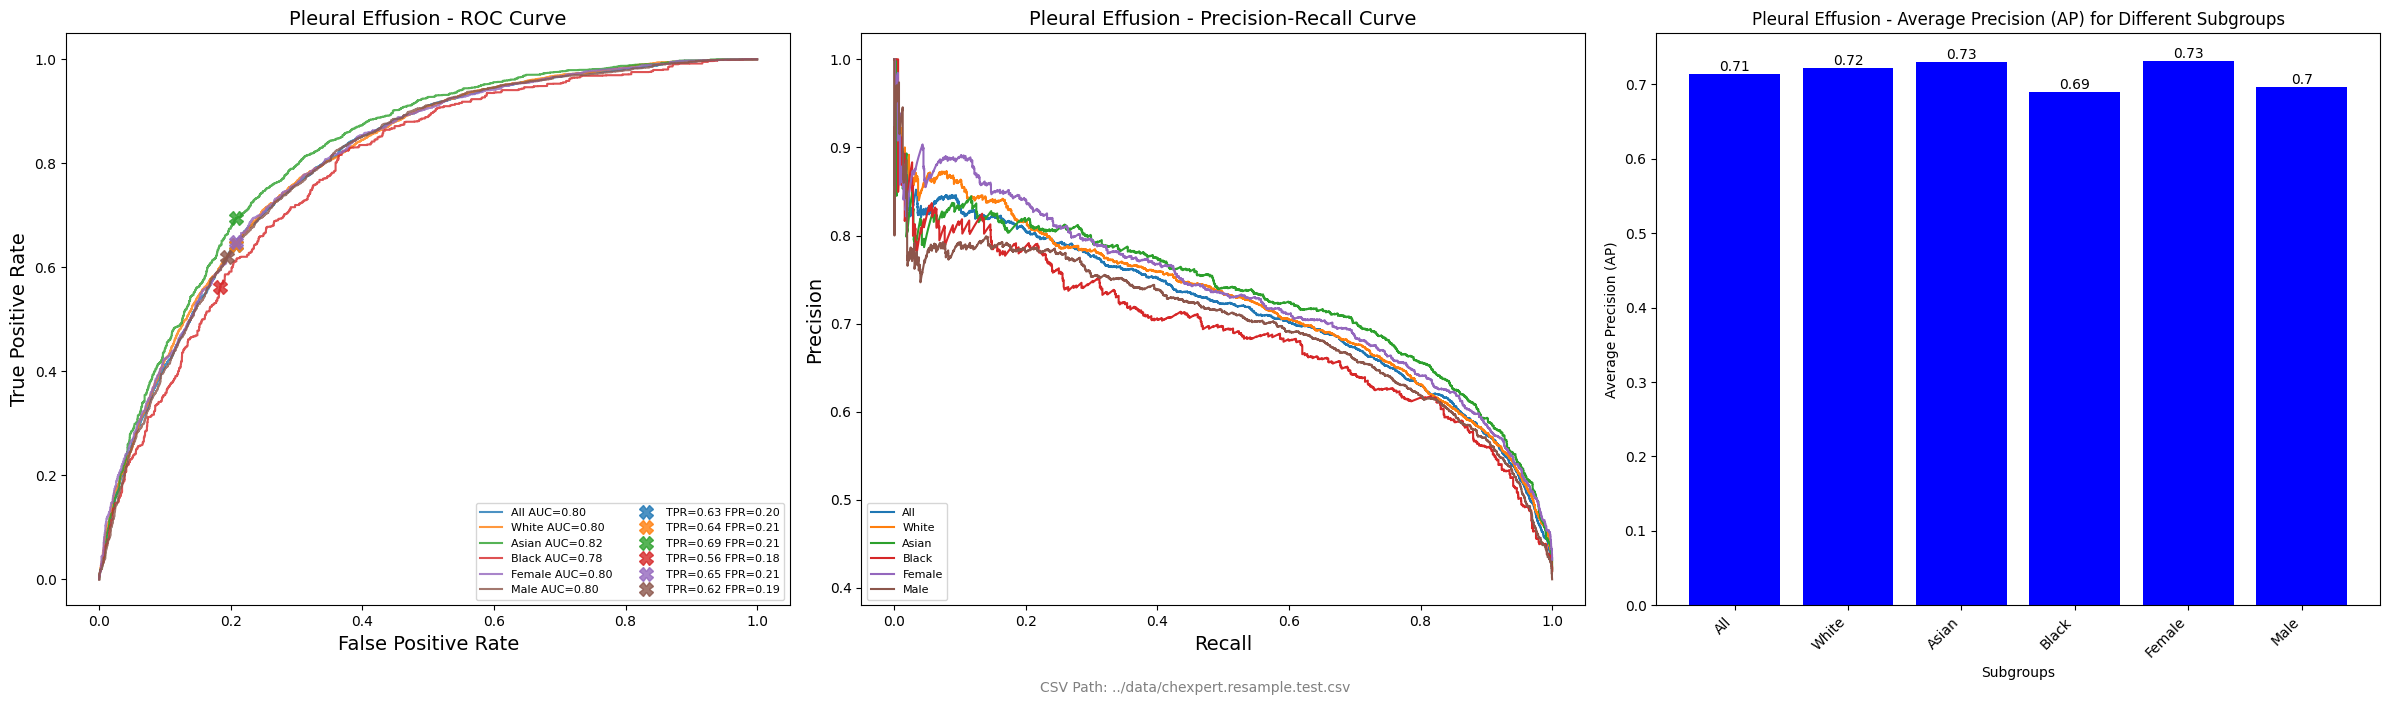

In [5]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0766
All	TPR 0.58 | FPR 0.20 | AUC 0.76
White	TPR 0.63 | FPR 0.23 | AUC 0.77
Asian	TPR 0.51 | FPR 0.18 | AUC 0.73
Black	TPR 0.58 | FPR 0.19 | AUC 0.78
Female	TPR 0.42 | FPR 0.12 | AUC 0.74
Male	TPR 0.71 | FPR 0.27 | AUC 0.79
All	AP 0.24
White	AP 0.24
Asian	AP 0.21
Black	AP 0.27
Female	AP 0.23
Male	AP 0.26


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


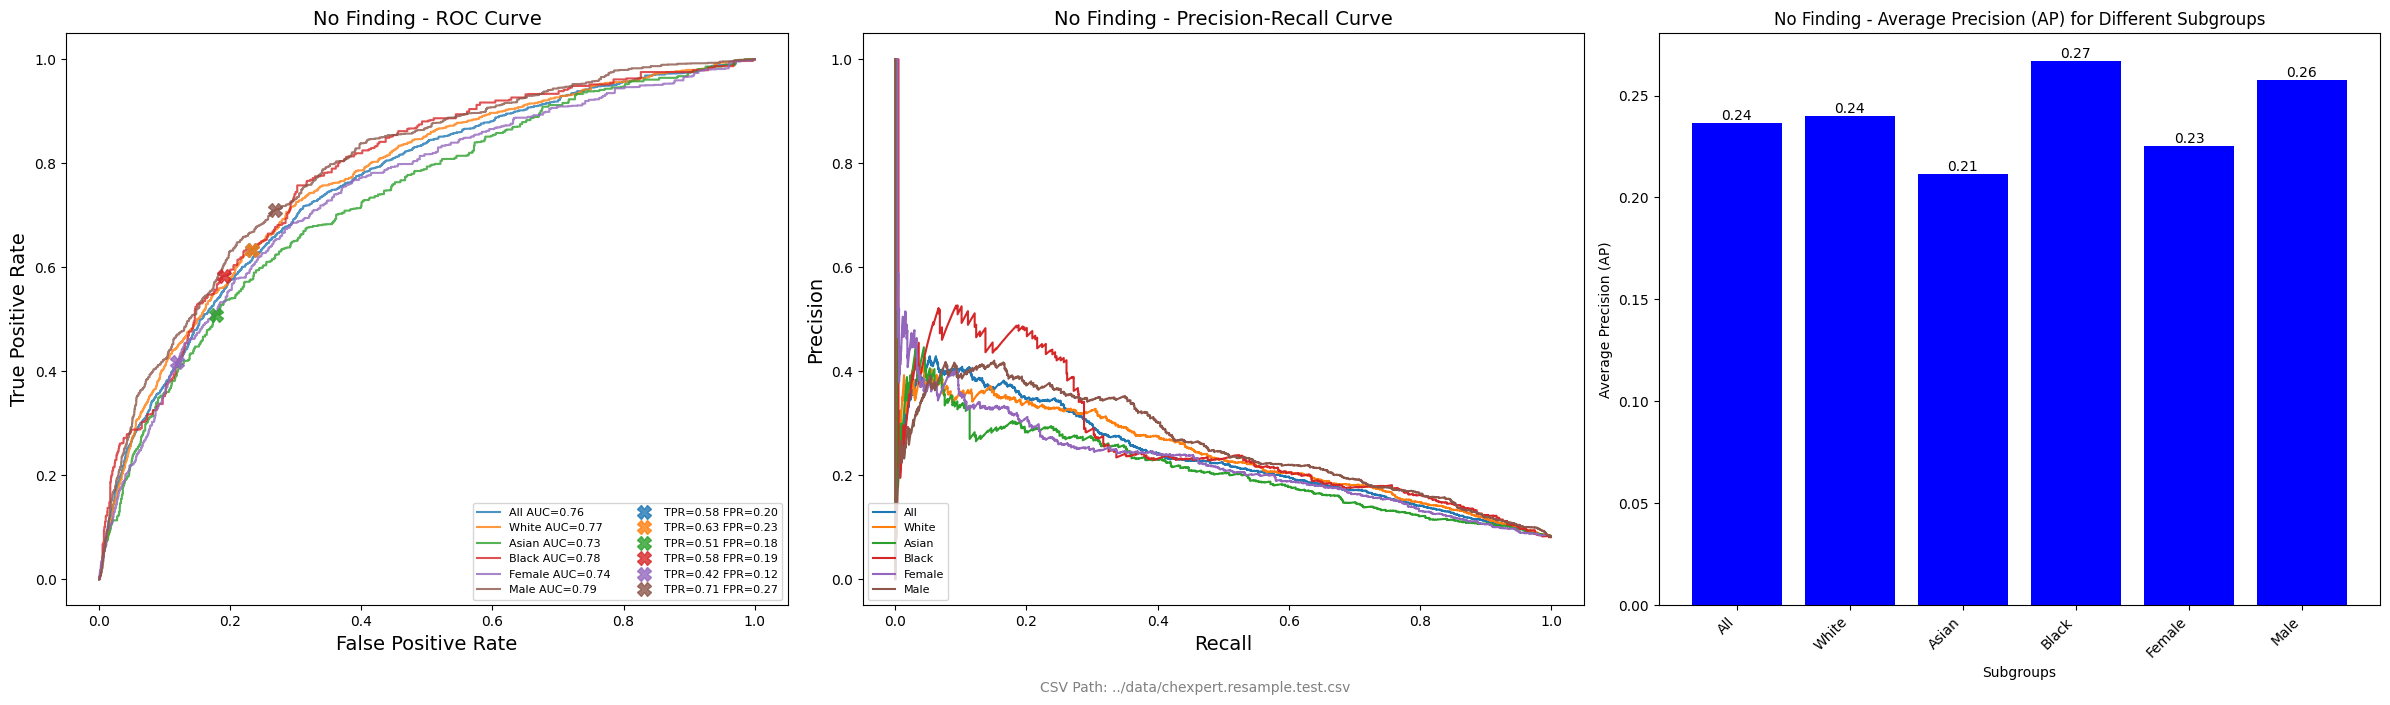

In [6]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_1.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.5381
All	TPR 0.46 | FPR 0.20 | AUC 0.71
White	TPR 0.41 | FPR 0.17 | AUC 0.71
Asian	TPR 0.51 | FPR 0.23 | AUC 0.72
Black	TPR 0.46 | FPR 0.20 | AUC 0.69
Female	TPR 0.54 | FPR 0.26 | AUC 0.70
Male	TPR 0.39 | FPR 0.15 | AUC 0.71
All	AP 0.60
White	AP 0.60
Asian	AP 0.61
Black	AP 0.59
Female	AP 0.61
Male	AP 0.59


/home/quan/code/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


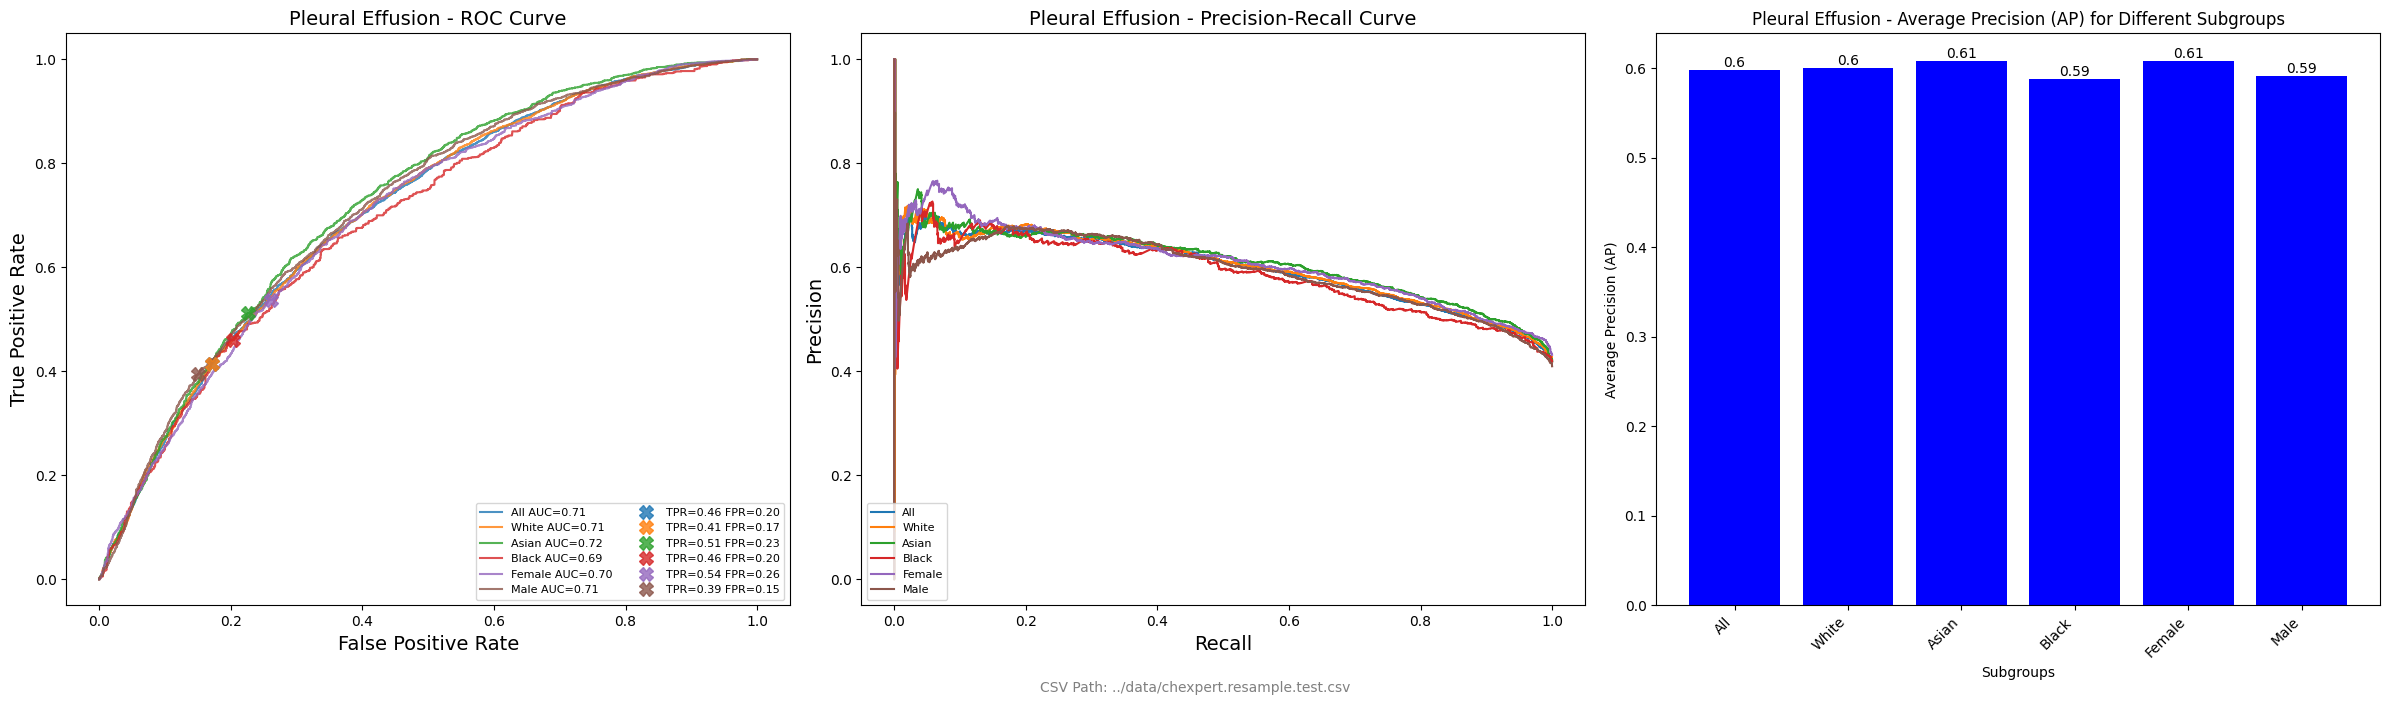

In [7]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_1.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )